
# Agrupamiento K-Means y Método del Codo

Este cuaderno explica paso a paso el algoritmo de agrupamiento K-Means utilizando Python, así como el método del codo para determinar el número óptimo de clústeres. Cada parte contiene explicaciones detalladas como si hubiera sido desarrollada por un estudiante con fines de aprendizaje.



## 1. Introducción al algoritmo K-Means

K-Means es un algoritmo de agrupamiento no supervisado que se utiliza para dividir un conjunto de datos en grupos (clústeres) basados en similitud. No requiere etiquetas previas, sino que agrupa los datos en función de su proximidad.

### Funcionamiento general del algoritmo

1. Se elige un número `k` de clústeres.
2. Se inicializan `k` centroides aleatorios.
3. Se asigna cada punto al centroide más cercano.
4. Se recalculan los centroides como el promedio de los puntos asignados a cada clúster.
5. Se repiten los pasos 3 y 4 hasta que los centroides ya no cambien significativamente.

El objetivo es minimizar la variabilidad dentro de cada clúster.



## 2. Formalización matemática

El objetivo del algoritmo K-Means es minimizar la siguiente función de costo:

$$
J = \sum_{k=1}^{K} \sum_{\mathbf{x}_i \in S_k} \|\mathbf{x}_i - \boldsymbol{\mu}_k\|^2
$$

Donde:

* $K$ es el número total de clústeres.
* $S_k$ es el conjunto de puntos de datos pertenecientes al clúster $k$.
* $\boldsymbol{\mu}_k$ es el centroide del clúster $S_k$.
* $\|\mathbf{x}_i - \boldsymbol{\mu}_k\|^2$ representa el cuadrado de la distancia euclidiana entre el punto de datos $\mathbf{x}_i$ y el centroide $\boldsymbol{\mu}_k$ de su clúster asignado.


In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans



Se importan las bibliotecas necesarias para trabajar con datos (`pandas`), graficar (`matplotlib` y `seaborn`) y aplicar agrupamiento (`KMeans`) y generación de datos artificiales (`make_blobs`).


In [2]:

X, y_real = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
df = pd.DataFrame(X, columns=["x", "y"])



Se generan 300 puntos agrupados en 4 clústeres mediante la función `make_blobs`.

- `n_samples=300`: número total de puntos
- `centers=4`: cantidad de agrupaciones reales simuladas
- `cluster_std=0.60`: dispersión dentro de cada grupo
- `random_state=0`: garantiza resultados reproducibles

Luego se convierten a un DataFrame para poder visualizar los datos fácilmente.


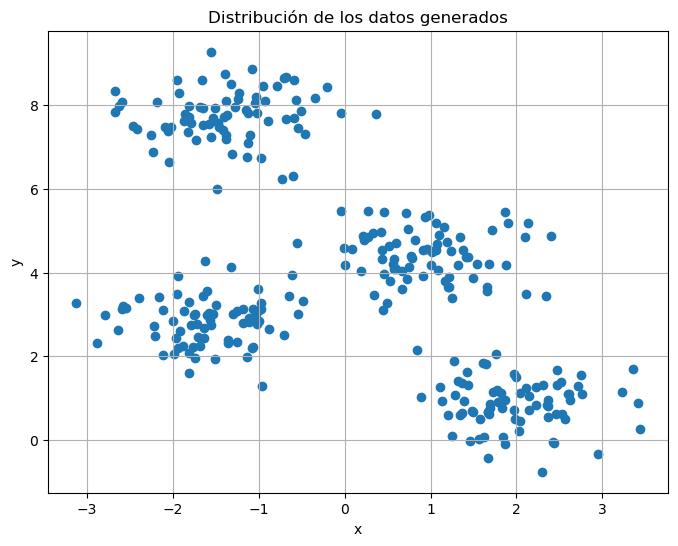

In [3]:

plt.figure(figsize=(8, 6))
plt.scatter(df["x"], df["y"])
plt.title("Distribución de los datos generados")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()



Se muestra la distribución de los datos generados sin aplicar aún ningún agrupamiento. Esto ayuda a observar si existe alguna estructura visible en los datos.


In [4]:

modelo_kmeans = KMeans(n_clusters=4, random_state=0)
df["cluster"] = modelo_kmeans.fit_predict(df)



Aquí se aplica el modelo `KMeans` con `n_clusters=4`, el cual se ajusta a los datos mediante `fit_predict()`:

- `fit_predict()` entrena el modelo y asigna una etiqueta de clúster a cada punto.
- El resultado se guarda en una nueva columna del DataFrame llamada `"cluster"`.


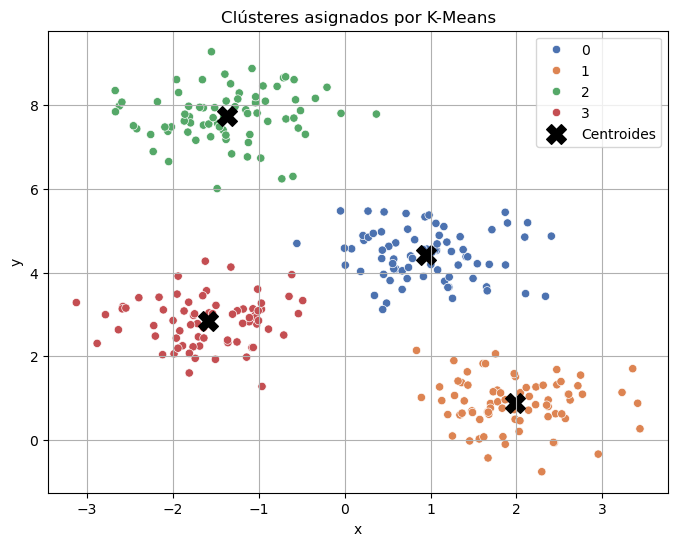

In [5]:

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="x", y="y", hue="cluster", palette="deep")
plt.scatter(modelo_kmeans.cluster_centers_[:, 0], modelo_kmeans.cluster_centers_[:, 1],
            color='black', marker='X', s=200, label='Centroides')
plt.title("Clústeres asignados por K-Means")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()



Se grafican los puntos de datos coloreados según el clúster al que fueron asignados. También se muestran los centroides con una 'X' negra.



## 3. Método del codo para determinar k

El valor de `k` puede no ser evidente. Por eso se utiliza el **método del codo**, que permite observar cómo cambia la inercia (distancia total a los centroides) a medida que se incrementa `k`.

La idea es buscar el punto en la gráfica donde la mejora empieza a ser marginal, como un "codo".


In [6]:

inertias = []
valores_k = range(1, 11)

for k in valores_k:
    modelo = KMeans(n_clusters=k, random_state=0)
    modelo.fit(df[["x", "y"]])
    inertias.append(modelo.inertia_)



En este bloque se calcula la inercia (suma de distancias cuadradas al centroide) para valores de `k` entre 1 y 10.

- `modelo.inertia_` devuelve la inercia de cada modelo entrenado.
- Guardamos esos valores para graficarlos.


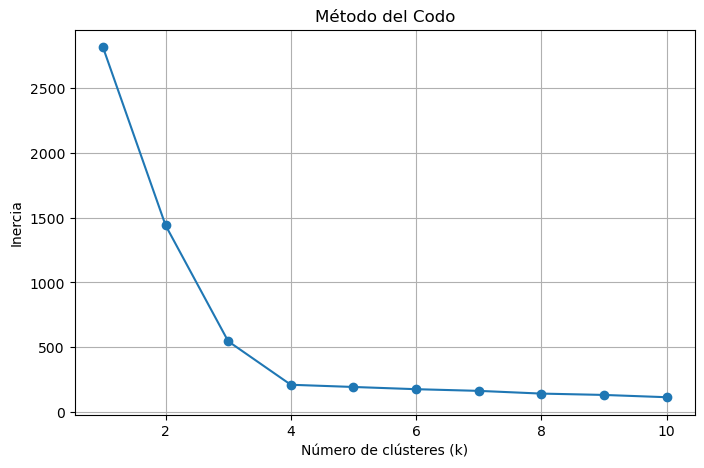

In [7]:

plt.figure(figsize=(8, 5))
plt.plot(valores_k, inertias, marker='o')
plt.title("Método del Codo")
plt.xlabel("Número de clústeres (k)")
plt.ylabel("Inercia")
plt.grid(True)
plt.show()



Se grafica la inercia frente al número de clústeres.

El valor de `k` ideal es aquel en el que la curva empieza a perder pendiente, es decir, donde agregar más clústeres ya no mejora mucho la agrupación.
